# Load Packages

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msn
import sweetviz as sv
from scipy.stats import skew

# Load Data

In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

## Basic Analysis

In [6]:
df.describe().T.style.bar(subset=["mean"], color="#205ff2")

,count,mean,std,min,25%,50%,75%,max
case_id,318438.000000,159219.500000,91925.276847,1.000000,79610.250000,159219.500000,238828.750000,318438.000000
Hospital_code,318438.000000,18.318841,8.633755,1.000000,11.000000,19.000000,26.000000,32.000000
City_Code_Hospital,318438.000000,4.771717,3.102535,1.000000,2.000000,5.000000,7.000000,13.000000
Available Extra Rooms in Hospital,318438.000000,3.197627,1.168171,0.000000,2.000000,3.000000,4.000000,24.000000
Bed Grade,318325.000000,2.625807,0.873146,1.000000,2.000000,3.000000,3.000000,4.000000
patientid,318438.000000,65747.579472,37979.936440,1.000000,32847.000000,65724.500000,98470.000000,131624.000000
City_Code_Patient,313906.000000,7.251859,4.745266,1.000000,4.000000,8.000000,8.000000,38.000000
Visitors with Patient,318438.000000,3.284099,1.764061,0.000000,2.000000,3.000000,4.000000,32.000000
Admission_Deposit,318438.000000,4880.749392,1086.776254,1800.000000,4186.000000,4741.000000,5409.000000,11008.000000


## Missing Data

<AxesSubplot:>

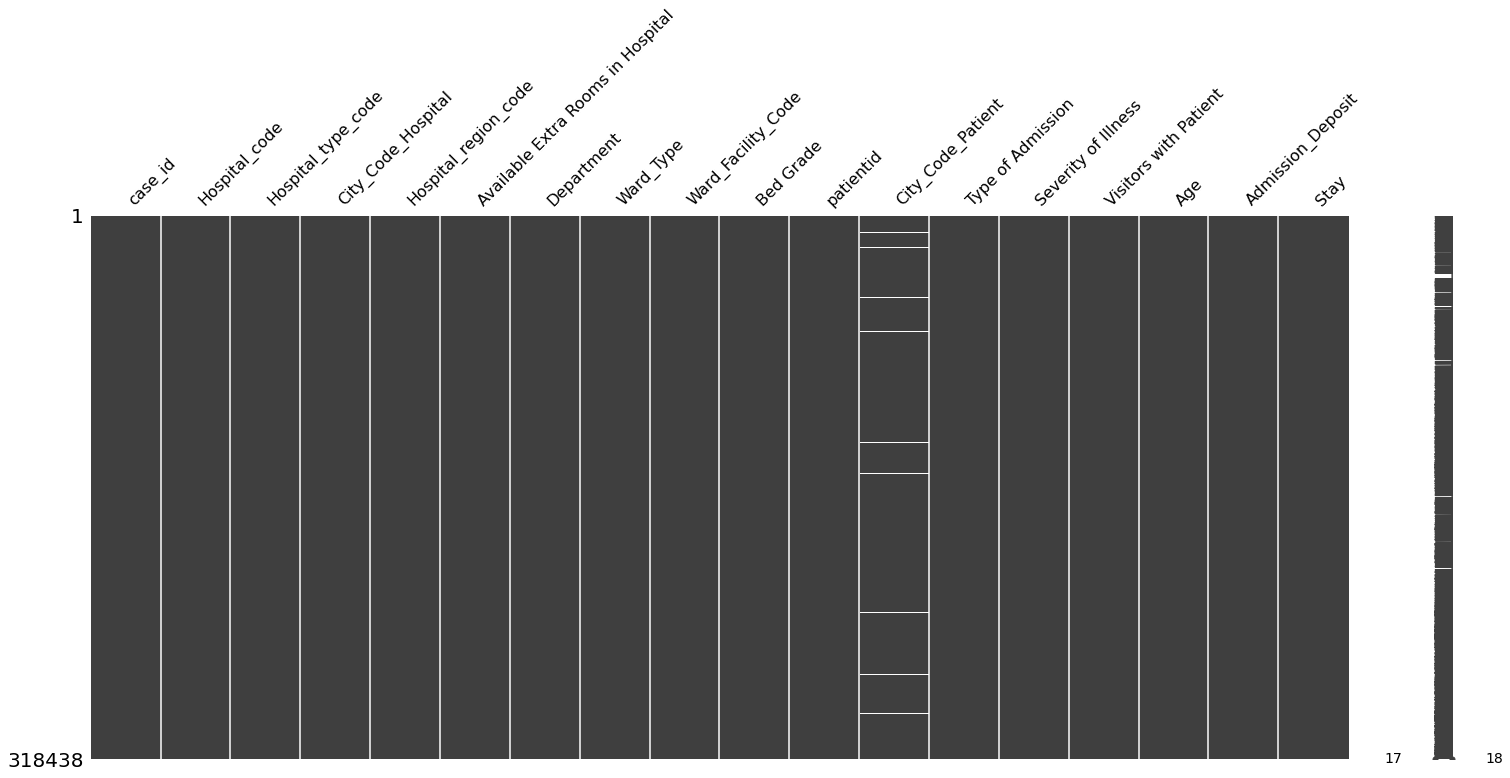

In [7]:
msn.matrix(df)

In [8]:
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
### There seems to be some missing data on the city patient code and Bed Grade

# EDA

## Univariate Distribution

In [33]:
cont_var = df[["Admission_Deposit"]]

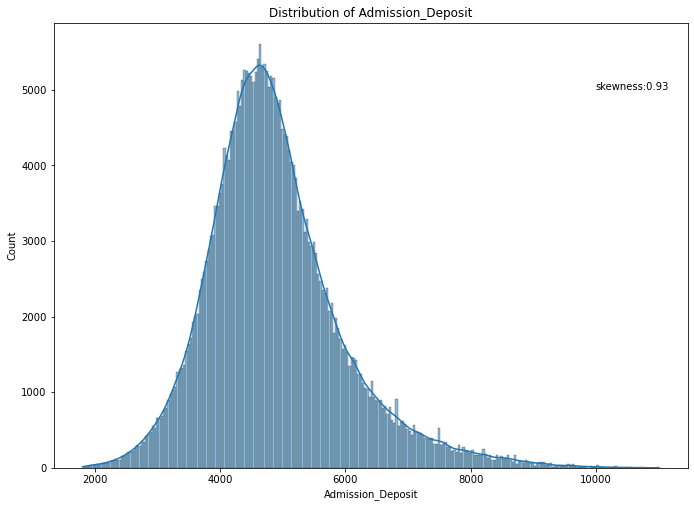

In [47]:
plt.figure(figsize = (25,18))
for i in range(len(cont_var.columns)):
    sk = skew(cont_var.iloc[:,i])
    plt.subplot(2,2,i+1)
    sns.histplot(cont_var.iloc[:,i], kde = True)
    plt.text(10000,5000,"skewness:{:0.2f}".format(sk))
    plt.title("Distribution of {}".format(cont_var.iloc[:,i].name))

In [12]:
cont_var.iloc[:,1]

0         2
1         2
2         2
3         2
4         2
         ..
318433    3
318434    4
318435    3
318436    5
318437    2
Name: Visitors with Patient, Length: 318438, dtype: int64